# Исследование рынка заведений общественного питания в Москве

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

## План исследования:
1. [Открытие и предобработка данных](#beginning)
    * [Работа с дубликатами](#duplicates)
2. [Анализ данных](#analysis)
    * [Исследование соотношения видов объектов общественного питания по количеству](#analysis_1)
    * [Исследование соотношения сетевых и несетевых заведений по количеству. Для какого вида объекта общественного питания характерно сетевое распространение?](#analysis_2)
    * [Что характерно для сетевых заведений](#analysis_3)    
    * [Описание среднего количества посадочных мест для каждого вида объекта общественного питания](#analysis_4)    
    * [Выделить в отдельный столбец информацию об улице из столбца address](#analysis_5)    
    * [Построить график топ-10 улиц по количеству объектов общественного питания. В каких районах Москвы находятся эти улицы?](#analysis_6)
    * [Найти число улиц с одним объектом общественного питания. В каких районах Москвы находятся эти улицы?](#analysis_7)    
    * [Исследовать распределение количества посадочных мест для улиц с большим количеством объектов общественного питания](#analysis_8)
3. [Вывод и рекомендации](#summary)
4. [Презентация](#presentation)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import io

In [2]:
!pip install plotly

In [3]:
from plotly import graph_objects as go

## <a id="beginning" style="color:black">1. Открытие и предобработка данных</a>

#### Описание данных  
rest_data:  
`object_name` — название объекта общественного питания;  
`chain` — сетевой ресторан;  
`object_type` — тип объекта общественного питания;  
`address` — адрес;  
`number` — количество посадочных мест.  

In [4]:
rest_data = pd.read_csv('./datasets/rest_data.csv')

In [5]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [6]:
rest_data.head(10)

id               object_name chain object_type  \
0  151635                   СМЕТАНА   нет        кафе   
1   77874                    Родник   нет        кафе   
2   24309           Кафе «Академия»   нет        кафе   
3   21894                ПИЦЦЕТОРИЯ    да        кафе   
4  119365    Кафе «Вишневая метель»   нет        кафе   
5   27429  СТОЛ. ПРИ ГОУ СОШ № 1051   нет    столовая   
6  148815                  Брусника    да        кафе   
7   20957               Буфет МТУСИ   нет    столовая   
8   20958               КПФ СЕМЬЯ-1   нет    столовая   
9   28858            Столовая МТУСИ   нет    столовая   

                                             address  number  
0         город Москва, улица Егора Абакумова, дом 9      48  
1  город Москва, улица Талалихина, дом 2/1, корпус 1      35  
2          город Москва, Абельмановская улица, дом 6      95  
3            город Москва, Абрамцевская улица, дом 1      40  
4  город Москва, Абрамцевская улица, дом 9, корпус 1      50  
5  город Москва, Абрамцевская улица, дом 15, корп...     240  
6      город Москва, переулок Сивцев Вражек, дом 6/2      10  
7  город Москва, Авиамоторная улица, дом 8, строе...      90  
8  город Москва, Авиамоторная улица, дом 8, строе...     150  
9  город Москва, Авиамоторная улица, дом 8, строе...     120

## <a id="duplicates" style="color:black">1.1. Работа с дубликатами</a>

По разнообразию вариантов написания названия объектов можно предположить, что дубликатов в таблице может быть довольно много, проверим наличие полных дубликатов:

In [7]:
rest_data.duplicated().sum()

0

Видимо у каждого объекта id уникальный, сделаем id индексом, найдем полные дубликаты:

In [8]:
rest_data.set_index('id').duplicated().sum()

82

In [9]:
rest_data = rest_data.set_index('id')
rest_data.drop_duplicates(inplace = True)

In [10]:
rest_data.shape

(15284, 5)

Для дальнейшей работы с дубликатами можно привести названия кафе к нижнему регистру, так же можно убрать слово "кафе", если с него начинается названия объекта, еще можно убрать кавычки

In [11]:
rest_data['object_name'] = rest_data['object_name'].str.lower()
rest_data.head()

object_name chain object_type  \
id                                                 
151635                 сметана   нет        кафе   
77874                   родник   нет        кафе   
24309          кафе «академия»   нет        кафе   
21894               пиццетория    да        кафе   
119365  кафе «вишневая метель»   нет        кафе   

                                                  address  number  
id                                                                 
151635         город Москва, улица Егора Абакумова, дом 9      48  
77874   город Москва, улица Талалихина, дом 2/1, корпус 1      35  
24309           город Москва, Абельмановская улица, дом 6      95  
21894             город Москва, Абрамцевская улица, дом 1      40  
119365  город Москва, Абрамцевская улица, дом 9, корпус 1      50

In [12]:
rest_data.duplicated().sum()

3

Всего 3 дубликата добавилось, ну что же, удалим хотя бы их

In [13]:
rest_data.drop_duplicates(inplace = True)

Кроме "кафе" можно удалить слово "кофейня" и "предприятие быстрого обслуживания"и еще несколько расхожих слов, если они в начале названия объекта. 

In [14]:
rest_data['object_name'] = rest_data['object_name'].str.strip()
rest_data['object_name'] = rest_data['object_name'].str.replace('^кафе\s', '')
rest_data['object_name'] = rest_data['object_name'].str.replace('^бар\s', '')
rest_data['object_name'] = rest_data['object_name'].str.replace('^суши-бар\s', '')
rest_data['object_name'] = rest_data['object_name'].str.replace('^закусочная\s', '')
rest_data['object_name'] = rest_data['object_name'].str.replace('^ресторан\s', '')
rest_data['object_name'] = rest_data['object_name'].str.replace('^кофейня\s', '')
rest_data['object_name'] = rest_data['object_name'].str.replace('^пиццерия\s', '')
rest_data['object_name'] = rest_data['object_name'].str.replace('^кальянная\s', '')
rest_data['object_name'] = rest_data['object_name'].str.replace('^кальян\s', '')
rest_data['object_name'] = rest_data['object_name'].str.replace('^кальян-бар\s', '')
rest_data['object_name'] = rest_data['object_name'].str.replace('^предприятие быстрого обслуживания\s', '')
rest_data['object_name'] = rest_data['object_name'].str.replace('^ресторан быстрого питания\s', '')
rest_data['object_name'] = rest_data['object_name'].str.replace('^предприятие быстрого питания\s', '')

rest_data['object_name'] = rest_data['object_name'].str.strip()

Удалим кавычки:

In [15]:
rest_data['object_name'] = rest_data['object_name'].str.replace('»', '')
rest_data['object_name'] = rest_data['object_name'].str.replace('«', '')
rest_data['object_name'] = rest_data['object_name'].str.strip()

In [16]:
rest_data['object_name'] = rest_data['object_name'].str.replace('сабвей', 'subway')
rest_data['object_name'] = rest_data['object_name'].str.replace('сабвэй', 'subway')
rest_data['object_name'] = rest_data['object_name'].str.replace('старбакс', 'starbucks')

In [17]:
rest_data.duplicated().sum()

0

In [18]:
rest_data.reset_index(inplace=True)

В таблице с данными есть дубликаты в названиях объектов. С помощью преведения названий к нижнему регистру, исключения вспомогательных слов, характеризующих тип заведения, удалось немного сократить дубликаты. Однако все еще есть названия заведений,которые записаны неединообразно, нужно будет иметь это ввиду при работе с сетевыми заведениями, группировке по названию сетевых заведений.

## <a id="analysis" style="color:black">2. Анализ данных</a>
<a id="top" style="color:black">Начала анализа</a>  
[Вывод и рекомендации](#summary)

### <a id="analysis_1" style="color:black">2.1 Исследование соотношения видов объектов общественного питания по количеству.</a>

In [19]:
rest_data.head()

id      object_name chain object_type  \
0  151635          сметана   нет        кафе   
1   77874           родник   нет        кафе   
2   24309         академия   нет        кафе   
3   21894       пиццетория    да        кафе   
4  119365  вишневая метель   нет        кафе   

                                             address  number  
0         город Москва, улица Егора Абакумова, дом 9      48  
1  город Москва, улица Талалихина, дом 2/1, корпус 1      35  
2          город Москва, Абельмановская улица, дом 6      95  
3            город Москва, Абрамцевская улица, дом 1      40  
4  город Москва, Абрамцевская улица, дом 9, корпус 1      50

Сгруппируем таблицу по типам объектов, найдем количество объектов для каждого типа. Тут можно считать по id, так как значения там уникальные.

In [20]:
objects = rest_data.groupby('object_type').agg({'id': 'count'}).reset_index()
objects.columns = ['object_type', 'amount']
objects.sort_values(by='amount', ascending=False)

object_type  amount
3                               кафе    6071
8                           столовая    2584
7                           ресторан    2282
6  предприятие быстрого обслуживания    1897
0                                бар     855
1                              буфет     576
4                          кафетерий     395
2                         закусочная     348
5          магазин (отдел кулинарии)     273

In [21]:
rest_objects_pic = (go.Figure(data=[go.Pie(labels=objects['object_type'], values=objects['amount'],
                                          title='Виды объектов общественного питания')]))
rest_objects_pic.show()

По количеству объектов на рынке общественного питания Москвы лидируют заведения, позиционирующие себя как кафе. Столовые, рестораны и предприятия быстрого обслуживания имеют примерно по одинаковому количеству объектов.

## <a id="analysis_2" style="color:black">2.2 Исследование соотношения сетевых и несетевых заведений по количеству. Для какого вида объекта общественного питания характерно сетевое распространение?</a>

In [22]:
chains = rest_data.groupby('chain').agg({'id': 'count'}).reset_index()
chains.columns = ['is_chain', 'amount']

In [23]:
rest_objects_chains = (go.Figure(data=[go.Pie(labels=chains['is_chain'], values=chains['amount'],
                                              title='Количество сетевых и несетевых заведений')]))
rest_objects_chains.show()

## Для какого вида объекта общественного питания характерно сетевое распространение?

In [24]:

chains_grouped = rest_data.query('chain == "да"').groupby('object_type').agg({'id': 'count'}).reset_index()
chains_grouped.columns = ['object_type', 'ch_amount']
chains_grouped.sort_values(by='ch_amount', ascending=False)

object_type  ch_amount
3                               кафе       1396
6  предприятие быстрого обслуживания        788
7                           ресторан        543
5          магазин (отдел кулинарии)         78
2                         закусочная         56
4                          кафетерий         52
0                                бар         37
1                              буфет         11
8                           столовая          3

Похоже больше всего сетевые заведения представлены кафе. Однако, мы помним, что кафе -- превалирующие объеекты общепита, так что посмотрим как соотносится общее количество объектов с количеством сетевых заведений для каждого вида объекта.

In [25]:
objects_amount_chains = objects.merge(chains_grouped, on='object_type', how='left')
objects_amount_chains['chains_part'] = (objects_amount_chains['ch_amount'] / objects_amount_chains['amount']).round(2)
objects_amount_chains = objects_amount_chains.sort_values(by='chains_part', ascending=False)
objects_amount_chains

object_type  amount  ch_amount  chains_part
6  предприятие быстрого обслуживания    1897        788         0.42
5          магазин (отдел кулинарии)     273         78         0.29
7                           ресторан    2282        543         0.24
3                               кафе    6071       1396         0.23
2                         закусочная     348         56         0.16
4                          кафетерий     395         52         0.13
0                                бар     855         37         0.04
1                              буфет     576         11         0.02
8                           столовая    2584          3         0.00

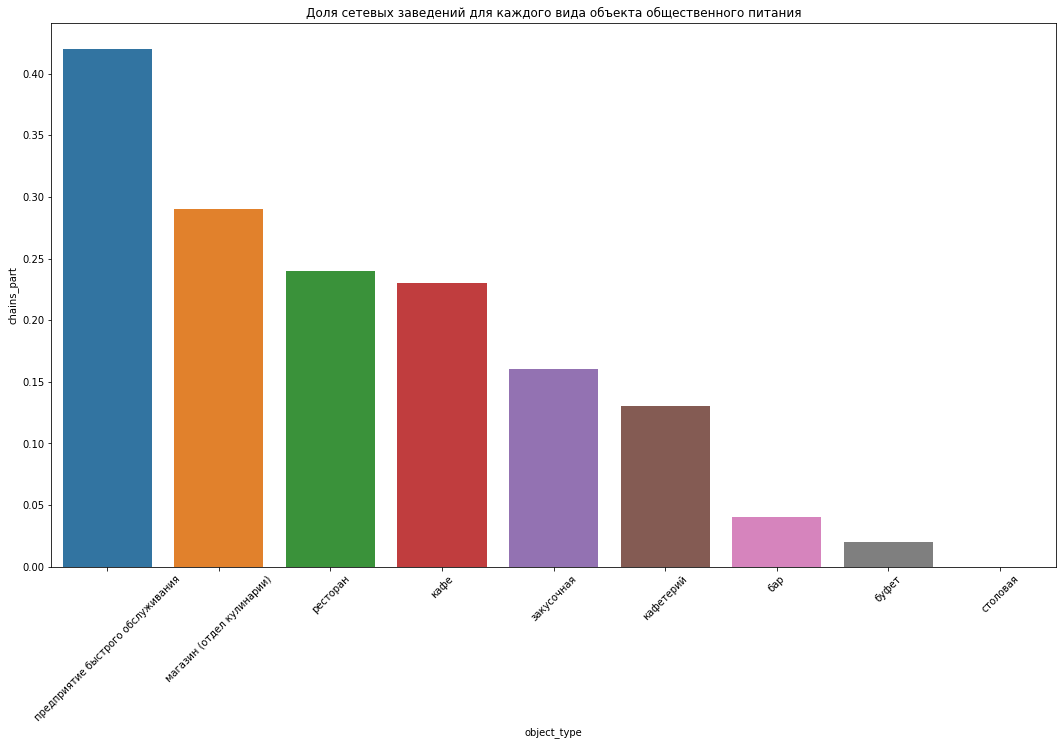

In [26]:
plt.figure(figsize=(18,10))
plt.title('Доля сетевых заведений для каждого вида объекта общественного питания')
plt.xticks(rotation=45)
sns.barplot(x='object_type', y='chains_part', data=objects_amount_chains);

Выходит, что для такого вида как "предприятие быстрого обслуживания" наиболее характерно сетевое распространение. Правда это всего 40% от всех объектов такого вида.

## <a id="analysis_3" style="color:black">2.3 Что характерно для сетевых заведений</a>
Много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [27]:
only_chains = rest_data.query('chain == "да"')
only_chains.head()

id object_name chain                        object_type  \
3    21894  пиццетория    да                               кафе   
6   148815    брусника    да                               кафе   
13   22579  алло пицца    да                               кафе   
16  144107    суши wok    да  предприятие быстрого обслуживания   
18   58565      тануки    да                           ресторан   

                                              address  number  
3             город Москва, Абрамцевская улица, дом 1      40  
6       город Москва, переулок Сивцев Вражек, дом 6/2      10  
13              город Москва, улица Авиаторов, дом 14      32  
16                город Москва, Азовская улица, дом 3       7  
18  город Москва, Большая Академическая улица, дом 65     160

Сначала посмотрим на сетевые заведения без группировки по сетям, оценим вместимость:

In [28]:
only_chains['number'].describe()

count    2964.000000
mean       52.981107
std        57.152817
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number, dtype: float64

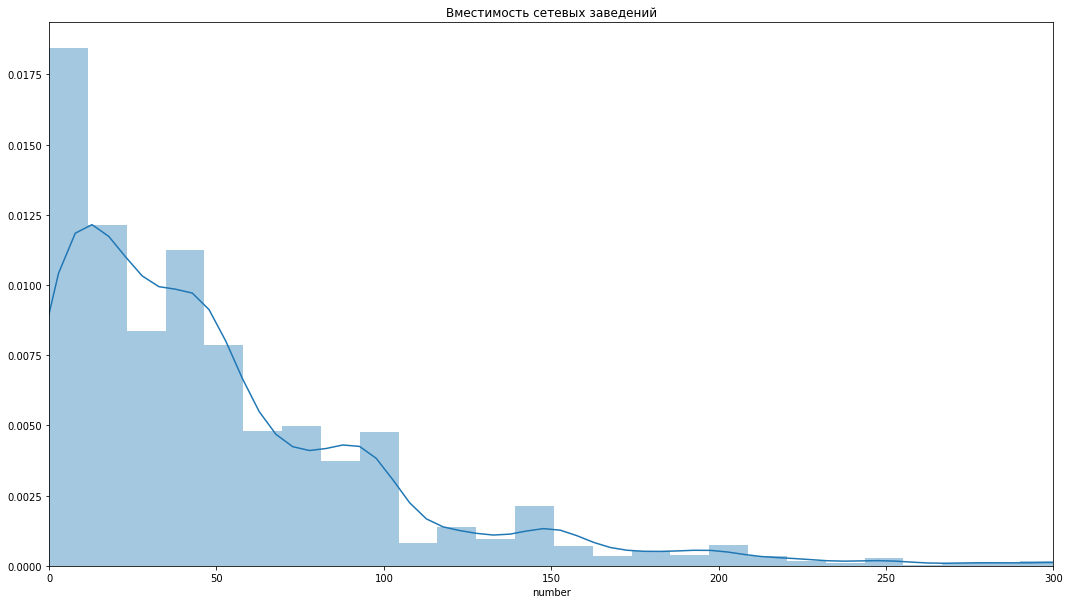

In [29]:
plt.figure(figsize=(18,10))
sns.distplot(only_chains['number'])
plt.xlim(0, 300);
plt.title('Вместимость сетевых заведений');

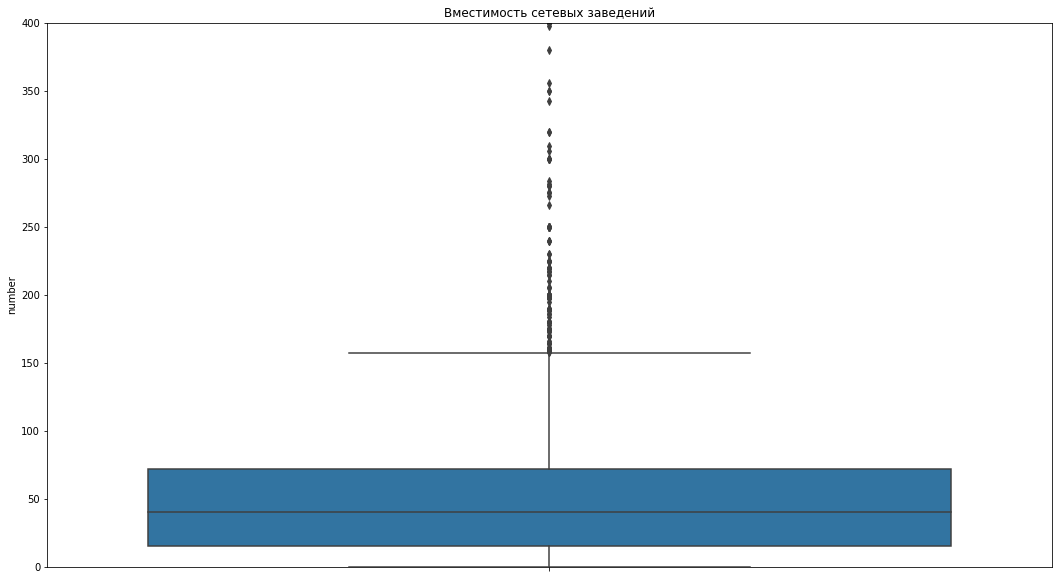

In [30]:
plt.figure(figsize=(18,10))
sns.boxplot(y=only_chains['number'], data=only_chains);
plt.ylim(0, 400);
plt.title('Вместимость сетевых заведений');

Половина сетевых заведений обладает вместимостью меньше 40 мест, у большей части заведений вместимость не более 72 мест, 150 мест - это уже аномалия.  
Сгруппируем по названию сетевые заведения, посмотрим, для каждого из них среднее и медиану посадочных мест. Кроме того, так мы можем посмотреть сетевые заведения по количеству объектов.

In [31]:
chains_size = only_chains.groupby('object_name',  as_index=False).agg({'id': 'count','number': ['mean', 'median']})
chains_size.columns = ['name', 'objects', 'number_mean', 'number_median']
chains_size.head()

name  objects  number_mean  number_median
0  beverly hills diner        1    88.000000           88.0
1             bierloga        1    75.000000           75.0
2        black & white        1    40.000000           40.0
3           bocconcino        3    66.666667           68.0
4                boobo        1    46.000000           46.0

Видно, что в сетевые заведения попали сети с одним объектом, видимо это дубликаты. Сначала посмотрим на распределение мест и число объектов для всей группы

In [32]:
chains_size['objects'].describe()

count    431.000000
mean       6.877030
std       20.246532
min        1.000000
25%        1.000000
50%        1.000000
75%        4.000000
max      183.000000
Name: objects, dtype: float64

In [33]:
chain_objects_distribution = chains_size.groupby('objects', as_index=False).agg({'name': 'count'})
chain_objects_distribution.columns = ['chain_size', 'chains_amount']
chain_objects_distribution.head()

chain_size  chains_amount
0           1            230
1           2             62
2           3             26
3           4             14
4           5              9

In [34]:
chains_objects_pic = (go.Figure(data=[go.Pie(labels=chain_objects_distribution['chain_size'],
                                           values=chain_objects_distribution['chains_amount'],
                                           title='Сетевые заведения по количеству объектов в сети')]))
chains_objects_pic.show()

Сенсация -- половина всех сетевых заведений -- сети с одним объектом! Вероятно это влияния не до конца убранных повторов.

Здесь получилась довольно дискретная группировка: столько-то сетей с одним объектом, столько-то с 10-ю объектами и т.д. Хотелось наглядно показать, сколько вообще сете с тем или иным количеством объектов. Если строю гистограмму, то получается не видно, что на сети с 1 объектом приходится почти 50%:

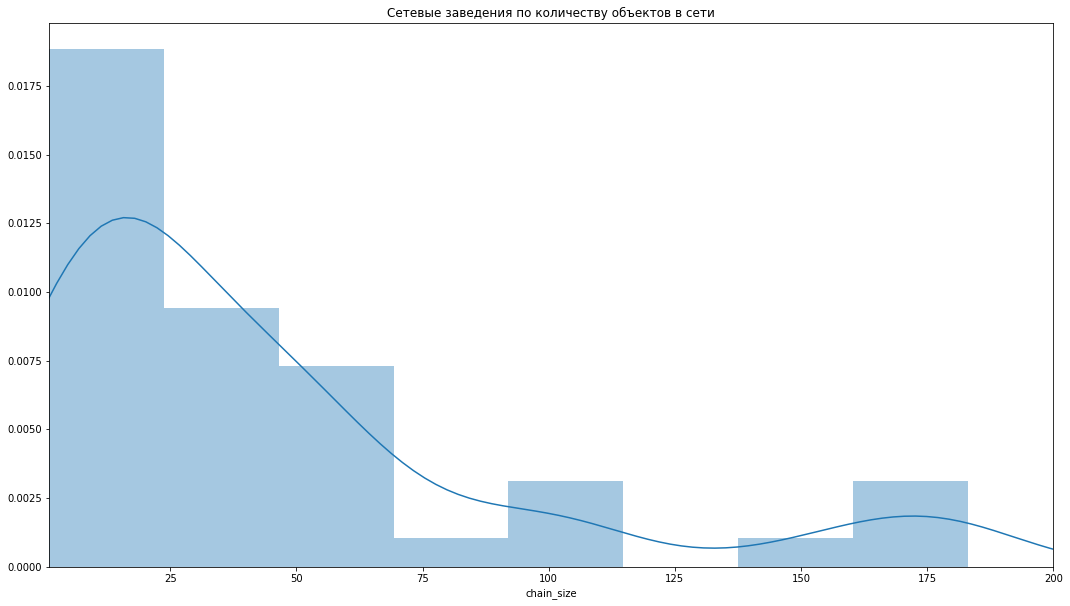

In [35]:
plt.figure(figsize=(18,10))
sns.distplot(chain_objects_distribution['chain_size'])
plt.xlim(1, 200);
plt.title('Сетевые заведения по количеству объектов в сети');

Согласно нашим данным сетевые заведения в большинстве своем сети до 4х объектов. Возьмем для рассмотрения сетевые заведения с количеством объектов больше 4х

In [36]:
chains_size.query('objects > 4')['objects'].describe()

count     99.000000
mean      25.010101
std       36.948529
min        5.000000
25%        6.000000
50%        9.000000
75%       25.000000
max      183.000000
Name: objects, dtype: float64

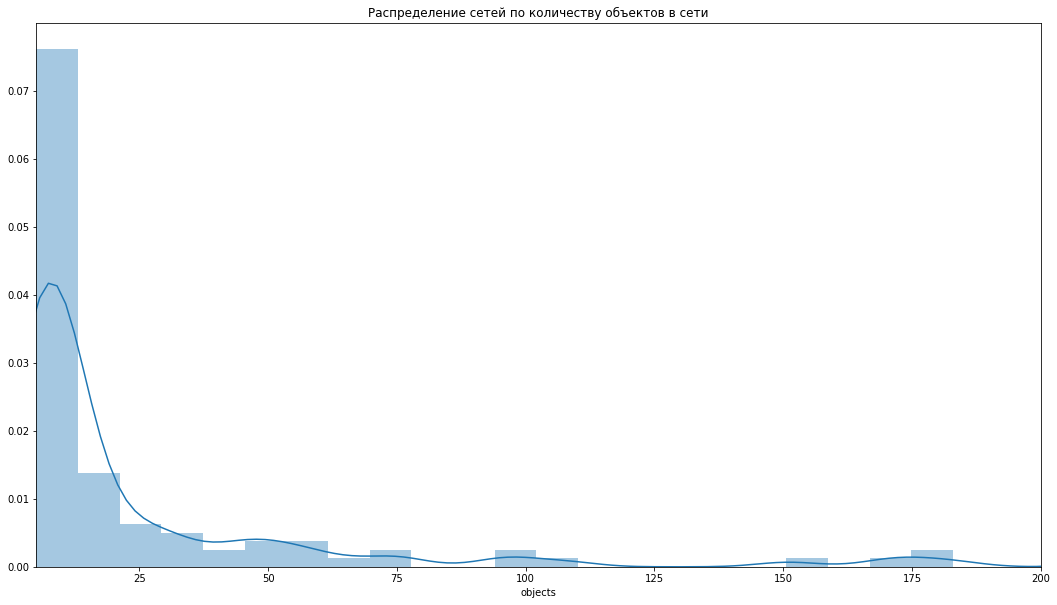

In [37]:
plt.figure(figsize=(18,10))
sns.distplot(chains_size.query('objects > 4')['objects'])
plt.xlim(5, 200);
plt.title('Распределение сетей по количеству объектов в сети');

Даже после того, как мы убрали сети до 4х объектов, сетевые заведения с количеством заведений больше 50 -- большая редкость. Размер половины сетей до 9 заведений.

In [38]:
chains_size.sort_values(by='objects', ascending=False).head(10)

name  objects  number_mean  number_median
416      шоколадница      183    57.814208           50.0
26               kfc      175    55.280000           46.0
240       макдоналдс      170    87.576471           76.0
111      бургер кинг      151    46.278146           44.0
371          теремок      108    26.768519           24.0
166   домино'с пицца       98    18.173469           16.0
221  крошка картошка       95    21.536842           15.0
355         суши wok       75     6.746667            6.0
250            милти       75     1.280000            0.0
279       папа джонс       65    22.307692           20.0

Вот так выглядит список самых крупных сетевых заведений, у некоторых число мест в среднем около 45 на каждый объект. Посмотрим, как выглядит распределение мест для более мелких сетей

In [39]:
chains_size.query('objects <= 8')['number_median'].describe()

count    378.000000
mean      58.165344
std       53.087072
min        0.000000
25%       20.000000
50%       45.000000
75%       80.000000
max      306.000000
Name: number_median, dtype: float64

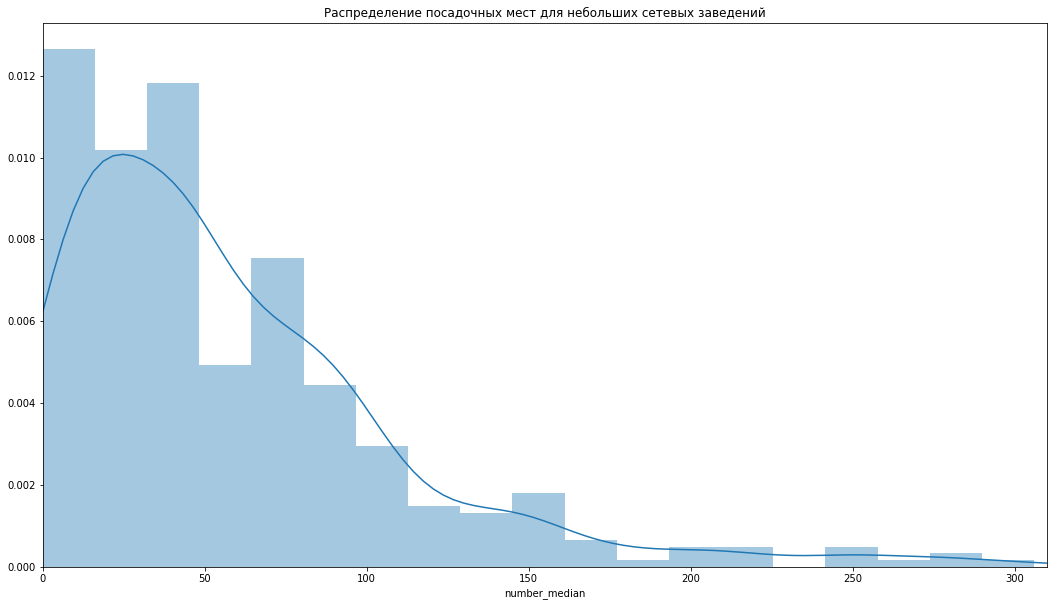

In [40]:
plt.figure(figsize=(18,10))
sns.distplot(chains_size.query('objects <= 8')['number_median'])
plt.xlim(0, 310);
plt.title('Распределение посадочных мест для небольших сетевых заведений');

Для сетевых заведений Москвы характерно большое количество маленьких сетей с вместимостью вреднем 45 человек.

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Супер! С этим разобрались, идем дальше
</div>

---


## <a id="analysis_4" style="color:black">2.4 Описание среднего количества посадочных мест для каждого вида объекта общественного питания</a>
Какой вид предоставляет в среднем самое большое количество посадочных мест?

In [41]:
mean_numbers = (rest_data.groupby('object_type')
                .agg({'number': 'mean'}).reset_index().sort_values(by='number', ascending=False))

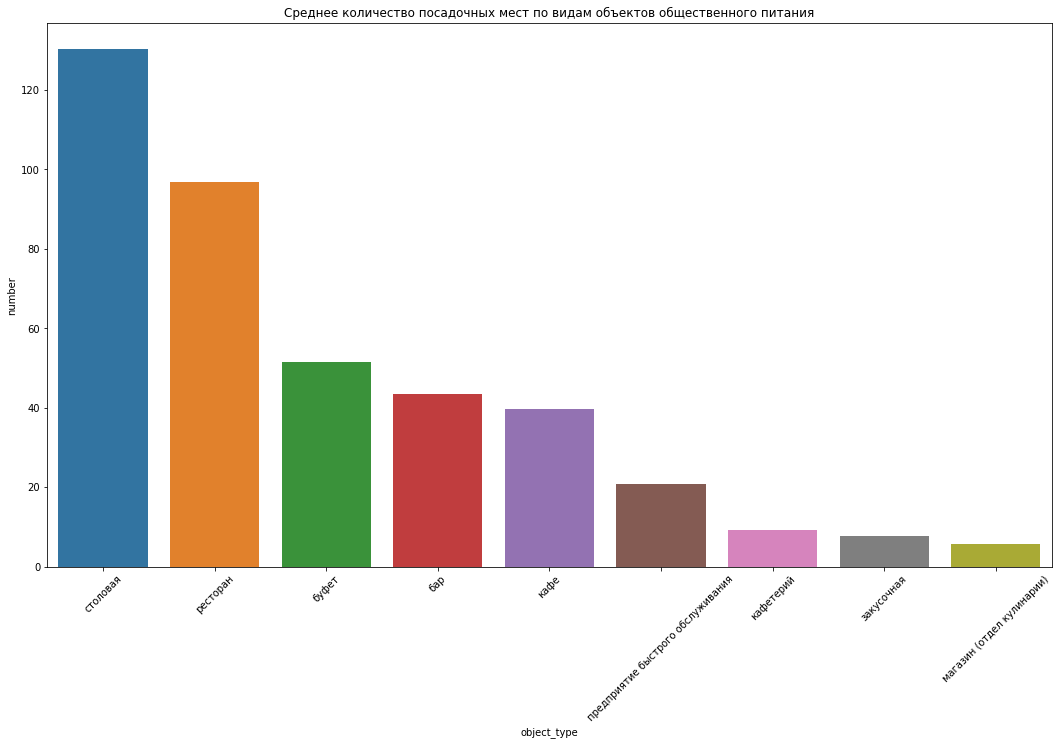

In [42]:
plt.figure(figsize=(18,10))
plt.title('Среднее количество посадочных мест по видам объектов общественного питания')
plt.xticks(rotation=45)
sns.barplot(x='object_type', y='number', data=mean_numbers);


В среднем самым вместительным видом объектов общественного питания являются столовые, там около 120 посадочных мест в заведении. Дальше -- рестораны, тут в среднем около 95 посадочных мест. Вспомним, что по количеству объектов самым популярным видом заведений считаются кафе. Они вмещают в среднем 45 посетителей.

## <a id="analysis_5" style="color:black">2.5 Выделить в отдельный столбец информацию об улице из столбца address</a>

In [43]:
rest_data.head()

id      object_name chain object_type  \
0  151635          сметана   нет        кафе   
1   77874           родник   нет        кафе   
2   24309         академия   нет        кафе   
3   21894       пиццетория    да        кафе   
4  119365  вишневая метель   нет        кафе   

                                             address  number  
0         город Москва, улица Егора Абакумова, дом 9      48  
1  город Москва, улица Талалихина, дом 2/1, корпус 1      35  
2          город Москва, Абельмановская улица, дом 6      95  
3            город Москва, Абрамцевская улица, дом 1      40  
4  город Москва, Абрамцевская улица, дом 9, корпус 1      50

In [44]:
rest_data['street'] = rest_data['address'].str.extract(',\s([-№\w+\s]+),')
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15281 entries, 0 to 15280
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15281 non-null  int64 
 1   object_name  15281 non-null  object
 2   chain        15281 non-null  object
 3   object_type  15281 non-null  object
 4   address      15281 non-null  object
 5   number       15281 non-null  int64 
 6   street       15246 non-null  object
dtypes: int64(2), object(5)
memory usage: 835.8+ KB


In [45]:
rest_data[rest_data['street'].isna()].head()

id            object_name chain object_type  \
859    23601  буфет - гбоу сош № 64   нет       буфет   
860    23604        буфет - гбоу 60   нет       буфет   
1491   25349         гранатовый сад   нет    ресторан   
7664  132359             la carotte   нет        кафе   
7800   28214    роснефть (закрытое)   нет    столовая   

                                         address  number street  
859                   Партизанская улица, дом 30     100    NaN  
860                   Партизанская улица, дом 30     100    NaN  
1491        Поречная улица, дом 5/14, строение 1      40    NaN  
7664              1-й Нагатинский проезд, дом 10     198    NaN  
7800  Софийская набережная, дом 26/1, строение 1      80    NaN

In [46]:
other_streets = rest_data[rest_data['street'].isna()][['id', 'address']]
other_streets['street'] = other_streets['address'].str.extract('([-№\w+\s]+),')
other_streets = other_streets[['id', 'street']].set_index('id')
other_streets.head()

street
id                            
23601       Партизанская улица
23604       Партизанская улица
25349           Поречная улица
132359  1-й Нагатинский проезд
28214     Софийская набережная

In [47]:
def fill_empty_streets(row):
    row_id = row['id']
    if row_id in other_streets.index:
        return other_streets.loc[row_id, 'street']
    else:
        return row['street']


rest_data['street'] = rest_data.apply(fill_empty_streets, axis=1)

In [48]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15281 entries, 0 to 15280
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15281 non-null  int64 
 1   object_name  15281 non-null  object
 2   chain        15281 non-null  object
 3   object_type  15281 non-null  object
 4   address      15281 non-null  object
 5   number       15281 non-null  int64 
 6   street       15281 non-null  object
dtypes: int64(2), object(5)
memory usage: 835.8+ KB


## <a id="analysis_6" style="color:black">2.6 Построить график топ-10 улиц по количеству объектов общественного питания. В каких районах Москвы находятся эти улицы?</a>

In [49]:
top_10_streets = (rest_data.groupby('street').agg({'id': 'count'})
                  .reset_index().sort_values(by='id', ascending=False).head(12))
top_10_streets.columns = ['street', 'objects']
top_10_streets

street  objects
1337        город Зеленоград      232
1435           проспект Мира      203
999        Профсоюзная улица      181
687   Ленинградский проспект      170
985   Пресненская набережная      167
408         Варшавское шоссе      162
690       Ленинский проспект      148
1401     поселение Сосенское      137
1432    проспект Вернадского      128
678     Кутузовский проспект      114
603          Каширское шоссе      111
609     Кировоградская улица      108

Здесь возьмем топ 12 заведений, так 10 будет приходится действительно на город и 2 на поселения.

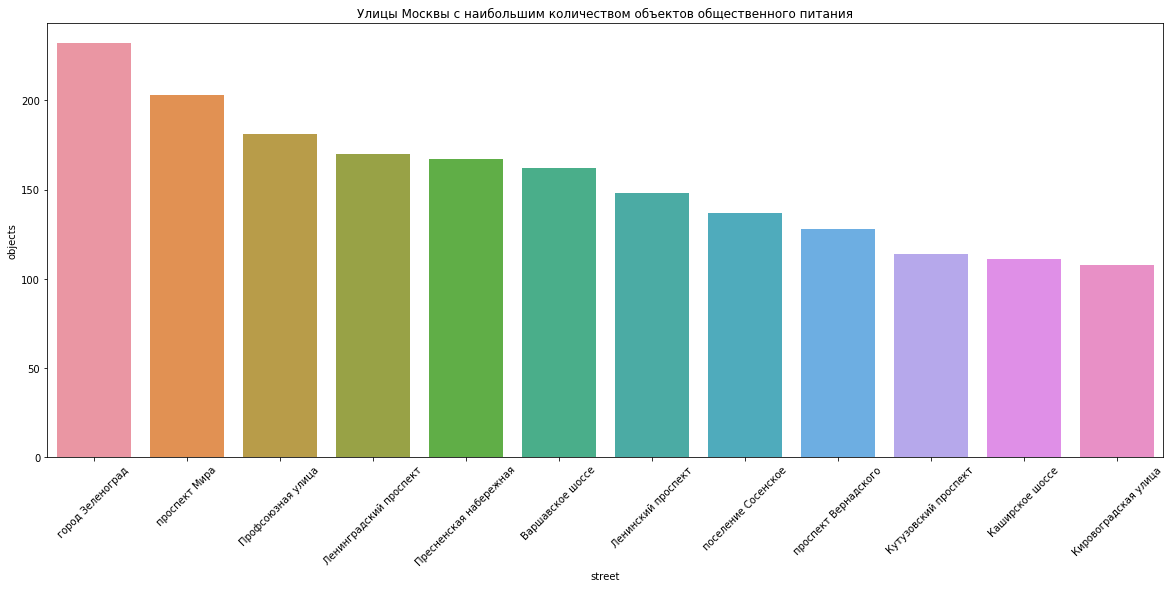

In [50]:
plt.figure(figsize=(20,8))
plt.title('Улицы Москвы с наибольшим количеством объектов общественного питания')
plt.xticks(rotation=45)
sns.barplot(x='street', y='objects', data=top_10_streets);

Теперь мы знаем улицы и поселения с нибольшим количеством объектов питания в Москве, найдем в каких районах они находятся. Возьмем таблицу "Контакты структур мосгаза по улицам и районам".

In [51]:
#mosgaz = pd.read_csv('http://hubofdata.ru/storage/f/2013-10-22T09%3A25%3A27.793Z/mosgaz-streets.csv')
response = requests.get('http://hubofdata.ru/storage/f/2013-10-22T09%3A25%3A27.793Z/mosgaz-streets.csv')
file = io.StringIO(response.content.decode('utf-8'))
mosgaz = pd.read_csv(file)

mosgaz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   streetname  4398 non-null   object
 1   areaid      4398 non-null   int64 
 2   okrug       4398 non-null   object
 3   area        4398 non-null   object
dtypes: int64(1), object(3)
memory usage: 137.6+ KB


In [52]:
mosgaz.head()

streetname  areaid okrug               area
0             Выставочный переулок      17   ЦАО  Пресненский район
1                     улица Гашека      17   ЦАО  Пресненский район
2          Большая Никитская улица      17   ЦАО  Пресненский район
3                Глубокий переулок      17   ЦАО  Пресненский район
4  Большой Гнездниковский переулок      17   ЦАО  Пресненский район

In [53]:
mosgaz.columns = ['street', 'areaid', 'okrug', 'area']

Улица может проходить в нескольких районах, исходя из предположения, что в центральном округе большьше заведений, выберем по одному району для каждой улицы, исходя из близости к центральному.  

In [54]:
mosgaz.groupby('okrug').agg({'areaid': ['max','min']})

areaid     
              max  min
okrug                 
ВАО            37   22
ЗАО            50   38
Зеленоград     53   51
САО            69   54
СВАО           86   70
СЗАО           94   87
ЦАО            21   12
ЮАО           110   95
ЮВАО          122  111
ЮЗАО          134  123

Диапазон id для ЦАО от 12 до 21, выберем из таблицы мосгаза по одному району для каждой улицы, исходя из логики: если есть район из ЦАО -- выбираем его, если нет -- берем рандомный. 

In [55]:
def find_area(series):
    areaid = np.random.choice(series)
    for s in series:
        if s in range(12, 22):
            areaid = s
    return areaid


In [56]:
selected_areas = mosgaz.groupby('street', as_index=False).agg({'areaid': find_area})
selected_areas.head()

street  areaid
0     1-й Автозаводский проезд      98
1      1-й Амбулаторный проезд      54
2        1-й Архивный переулок      20
3  1-й Бабьегородский переулок      21
4      1-й Балтийский переулок      54

Смержим подготовленный датасет мосгаза с то-12 улиц и поселений Москвы

In [57]:
selected_areas = selected_areas.merge(mosgaz, on=['street', 'areaid'], how='left')
selected_areas.head()

street  areaid okrug               area
0     1-й Автозаводский проезд      98   ЮАО  Даниловский район
1      1-й Амбулаторный проезд      54   САО     Район Аэропорт
2        1-й Архивный переулок      20   ЦАО    Район Хамовники
3  1-й Бабьегородский переулок      21   ЦАО     Район Якиманка
4      1-й Балтийский переулок      54   САО     Район Аэропорт

In [58]:
area_streets_top10 = top_10_streets.merge(selected_areas, on='street',  how='left')
area_streets_top10

street  objects  areaid       okrug  \
0         город Зеленоград      232    52.0  Зеленоград   
1            проспект Мира      203    16.0         ЦАО   
2        Профсоюзная улица      181   123.0        ЮЗАО   
3   Ленинградский проспект      170    55.0         САО   
4   Пресненская набережная      167    17.0         ЦАО   
5         Варшавское шоссе      162   104.0         ЮАО   
6       Ленинский проспект      148    21.0         ЦАО   
7      поселение Сосенское      137     NaN         NaN   
8     проспект Вернадского      128    44.0         ЗАО   
9     Кутузовский проспект      114    49.0         ЗАО   
10         Каширское шоссе      111   102.0         ЮАО   
11    Кировоградская улица      108   109.0         ЮАО   

                           area  
0       Район Матушкино-Савелки  
1               Мещанский район  
2           Академический район  
3                 Район Беговой  
4             Пресненский район  
5                Нагорный район  
6                Район Якиманка  
7                           NaN  
8    Район Проспект Вернадского  
9          Район Фили-Давыдково  
10     Район Нагатино-Садовники  
11  Район Чертаново Центральное

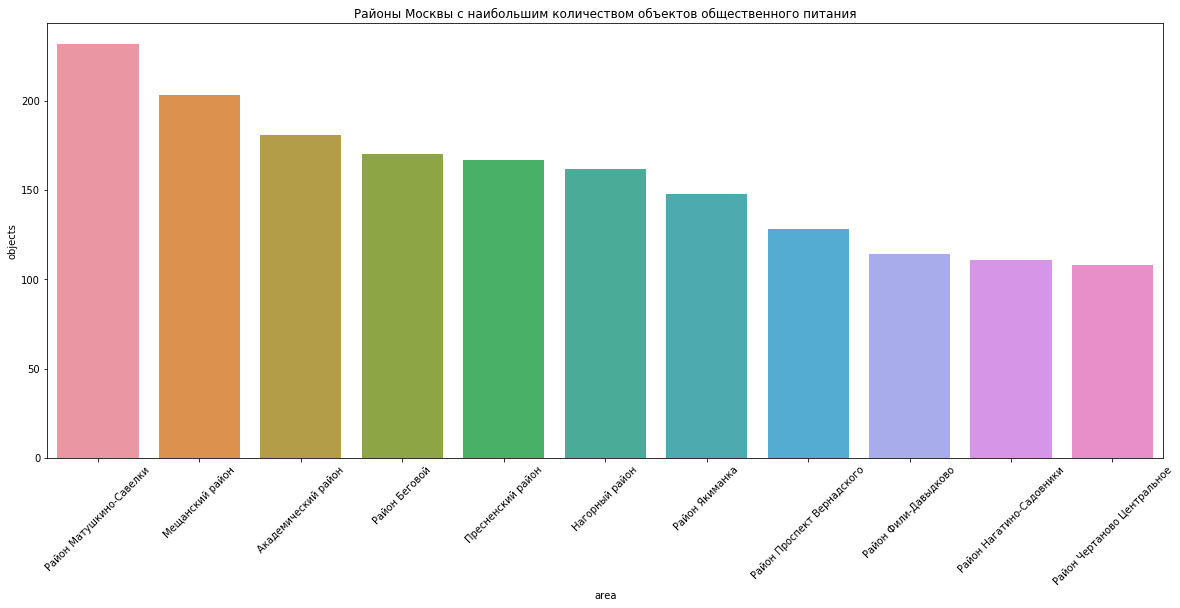

In [59]:
plt.figure(figsize=(20,8))
plt.title('Районы Москвы с наибольшим количеством объектов общественного питания')
plt.xticks(rotation=45)
sns.barplot(x='area', y='objects', data=area_streets_top10);

Из центрального округа в лидирующих районах только три: Мещанский, Якиманка и Пресненский. Чтож популярность у мест общественного питания есть не только в центральных районах. Поселение Сосенское вошло бы в этот график после района Тропарево-Никулино. Большое количество мест общественного питания в районе Крюково (Зеленоград), здесь произошло так из-за того, что этот городок проходи без названия улиц.

## <a id="analysis_7" style="color:black">2.7 Найти число улиц с одним объектом общественного питания. В каких районах Москвы находятся эти улицы?</a>

In [60]:
rest_data.head()

id      object_name chain object_type  \
0  151635          сметана   нет        кафе   
1   77874           родник   нет        кафе   
2   24309         академия   нет        кафе   
3   21894       пиццетория    да        кафе   
4  119365  вишневая метель   нет        кафе   

                                             address  number  \
0         город Москва, улица Егора Абакумова, дом 9      48   
1  город Москва, улица Талалихина, дом 2/1, корпус 1      35   
2          город Москва, Абельмановская улица, дом 6      95   
3            город Москва, Абрамцевская улица, дом 1      40   
4  город Москва, Абрамцевская улица, дом 9, корпус 1      50   

                  street  
0  улица Егора Абакумова  
1       улица Талалихина  
2   Абельмановская улица  
3     Абрамцевская улица  
4     Абрамцевская улица

In [61]:
one_obj_streets = (rest_data.groupby('street').agg({'id': 'count', 'object_type': 'max', 'object_name': 'max'})
                   .query('id == 1').reset_index())
one_obj_streets

street  id object_type  \
0      1-й Балтийский переулок   1    ресторан   
1       1-й Басманный переулок   1    столовая   
2      1-й Ботанический проезд   1    столовая   
3      1-й Вешняковский проезд   1    столовая   
4    1-й Голутвинский переулок   1        кафе   
..                         ...  ..         ...   
557             улица Шеногина   1    столовая   
558             улица Шумилова   1    столовая   
559              улица Шумкина   1        кафе   
560                улица Щорса   1    столовая   
561               шоссе Фрезер   1    столовая   

                                           object_name  
0                                               хуанхэ  
1               столовая института мировых цивилизаций  
2    буфет при гуп объединенный комбинат школьно пи...  
3                                   столовая гну виэсх  
4                                                шелби  
..                                                 ...  
557                                           столовая  
558  гбоу школа с углубленным изучением английского...  
559                                         шумкина 26  
560                                         школа 1009  
561              столовая спец.база атп-3 мосводоканал  

[562 rows x 4 columns]

Всего **562 улицы в Москве с одним объектом общественного питания**.  
Для определения районов воспользуемся полученной на предыдущем шаге таблицей selected_areas (таблица мосгаз с одним районом на улицу)

In [62]:
one_obj_streets_area = one_obj_streets.merge(selected_areas, on='street',  how='left')
one_obj_streets_area.dropna().sort_values(by='areaid')

street  id object_type              object_name  \
414              Хлебный переулок   1        кафе    антикинотеатр newtone   
231          Композиторская улица   1        кафе                   корнер   
223              Калошин переулок   1        кафе          секретное место   
221             Калашный переулок   1        кафе                 skuratov   
17   1-й Николощеповский переулок   1    ресторан                   бабель   
..                            ...  ..         ...                      ...   
506           улица Инессы Арманд   1       буфет  8-ой троллейбусный парк   
385               Тарусская улица   1        кафе                    кунак   
474            улица Айвазовского   1        кафе                стильавто   
435             Ясногорская улица   1    ресторан       территория ясенево   
543                улица Рокотова   1        кафе                    оазис   

     areaid okrug           area  
414    12.0   ЦАО    Район Арбат  
231    12.0   ЦАО    Район Арбат  
223    12.0   ЦАО    Район Арбат  
221    12.0   ЦАО    Район Арбат  
17     12.0   ЦАО    Район Арбат  
..      ...   ...            ...  
506   134.0  ЮЗАО  Район Ясенево  
385   134.0  ЮЗАО  Район Ясенево  
474   134.0  ЮЗАО  Район Ясенево  
435   134.0  ЮЗАО  Район Ясенево  
543   134.0  ЮЗАО  Район Ясенево  

[516 rows x 7 columns]

Чтож, районы ЦАО тут тоже есть

In [63]:
one_obj_streets_area['area'].unique()

array(['Район Аэропорт', 'Красносельский район', 'Район Свиблово',
       'Рязанский район', 'Район Якиманка', 'Район Хамовники',
       'Район Соколиная Гора', 'Даниловский район', 'Мещанский район',
       'Таганский район', 'Район Лефортово', 'Район Печатники',
       'Район Сокольники', 'Район Замоскворечье', 'Хорошевский район',
       'Район Арбат', 'Алексеевский район', 'Район Текстильщики',
       'Район Ростокино', 'Район Раменки', 'Район Хорошево-Мневники',
       'Район Покровское-Стрешнево', 'Район Марьина роща',
       'Район Богородское', 'Нижегородский район', 'Тверской район',
       'Лосиноостровский район', 'Район Преображенское',
       'Район Ново-Переделкино', nan, 'Район Восточное Измайлово',
       'Район Беговой', 'Донской район', 'Район Гольяново',
       'Войковский Район', 'Савеловский район', 'Район Измайлово',
       'Район Филевский Парк', 'Район Перово', 'Район Чертаново Южное',
       'Южнопортовый Район', 'Головинский район', 'Район Южное Бутово',
     

Похоже, что чуть ли не в каждом районе Москвы есть улица с одним объектом общественного питания)

Дело в том, что в Москве есть и очень маленькие улицы, и в центральном районе тоже, там естесственно приходится не больше одно объекта на одну улицу.  
Посмотрим, в каких округах расположены улицы с одним объектом общественного питания

In [64]:
one_obj_streets_area.head()

street  id object_type  \
0    1-й Балтийский переулок   1    ресторан   
1     1-й Басманный переулок   1    столовая   
2    1-й Ботанический проезд   1    столовая   
3    1-й Вешняковский проезд   1    столовая   
4  1-й Голутвинский переулок   1        кафе   

                                         object_name  areaid okrug  \
0                                             хуанхэ    54.0   САО   
1             столовая института мировых цивилизаций    15.0   ЦАО   
2  буфет при гуп объединенный комбинат школьно пи...    82.0  СВАО   
3                                 столовая гну виэсх   120.0  ЮВАО   
4                                              шелби    21.0   ЦАО   

                   area  
0        Район Аэропорт  
1  Красносельский район  
2        Район Свиблово  
3       Рязанский район  
4        Район Якиманка

In [65]:
one_objects_grouped = one_obj_streets_area.groupby('okrug', as_index=False).agg({'id': 'sum'})
one_objects_grouped.sort_values(by='id', ascending=False)

okrug   id
5   ЦАО  172
0   ВАО   64
3  СВАО   63
7  ЮВАО   51
2   САО   50
1   ЗАО   42
8  ЮЗАО   27
4  СЗАО   26
6   ЮАО   21

In [66]:
one_object_pic = (go.Figure(data=[go.Pie(labels=one_objects_grouped['okrug'],
                                           values=one_objects_grouped['id'],
                                           title='Улицы с одним объектом общепита по округам')]))
one_object_pic.show()

Наибольшее число в центральном округе (видимо для этого округа наиболее характерны маленькие улицы). Так же такие улицы есть в восточном и северо-восточном округе. Но тут, возможно, действительно маленькое количество заведений на улице.

## <a id="analysis_8" style="color:black">2.8 Исследовать распределение количества посадочных мест для улиц с большим количеством объектов общественного питания</a>

Посмотрим, что значит улицы с большим количеством мест общественного питания.

In [67]:
top_streets = (rest_data.groupby('street').agg({'id': 'count'})
                  .reset_index().sort_values(by='id', ascending=False))


In [68]:
top_streets['id'].describe()

count    1883.000000
mean        8.115242
std        16.981142
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max       232.000000
Name: id, dtype: float64

(0, 50)

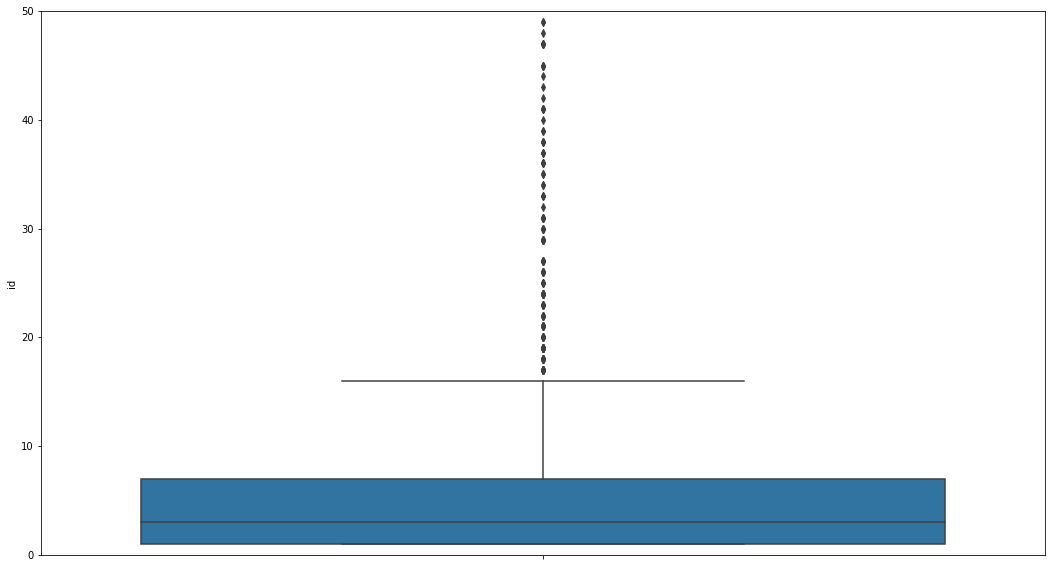

In [69]:
plt.figure(figsize=(18, 10))
sns.boxplot(y=top_streets['id']);
plt.ylim(0, 50)

Больше 17 заведений на улице -- уже аномалия. Можно принять за большое количество объектов для одной улицы - 50 и взять больше, чем топ 10 улиц.

In [70]:
top_50_streets = top_streets.query('id >= 50')

In [71]:
only_top_streets = rest_data[rest_data['street'].isin(top_50_streets['street'])]
only_top_streets.head()

id              object_name chain object_type  \
21   84832                      уют   нет        кафе   
22   26931           долина чайхона   нет        кафе   
23   28751  гбоу школа № 1411 (970)   нет    столовая   
24  125608                кафетерий   нет   кафетерий   
25   81554           домино'с пицца    да        кафе   

                                      address  number              street  
21   город Москва, Алтуфьевское шоссе, дом 14     110  Алтуфьевское шоссе  
22   город Москва, Алтуфьевское шоссе, дом 14     150  Алтуфьевское шоссе  
23  город Москва, Алтуфьевское шоссе, дом 42Б     120  Алтуфьевское шоссе  
24   город Москва, Алтуфьевское шоссе, дом 56       6  Алтуфьевское шоссе  
25   город Москва, Алтуфьевское шоссе, дом 56      24  Алтуфьевское шоссе

In [72]:
only_top_streets['number'].describe()

count    4352.000000
mean       52.060202
std        75.685168
min         0.000000
25%        10.000000
50%        30.000000
75%        65.000000
max      1700.000000
Name: number, dtype: float64

(0, 300)

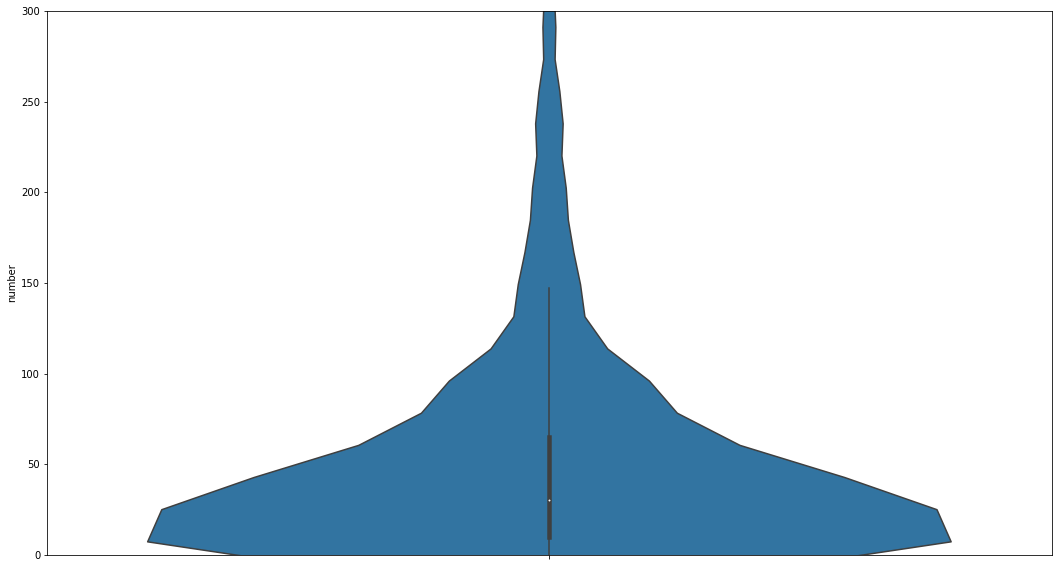

In [73]:
plt.figure(figsize=(18,10))
sns.violinplot(y=only_top_streets['number']);
plt.ylim(0, 300)

Для заведений  на улицах с большим количеством объектов общественного питания характерна вместимость от 10 до 30 человек. Так же есть аномалии с вместимостью 1700, посмотрим на них

In [74]:
only_top_streets.query('number >= 500').sort_values(by='number', ascending=False)

id                               object_name chain object_type  \
12673  199696                      arena by soho family   нет         бар   
9035    19719  комбинат питания управление академсервис   нет    столовая   
4476    27024                                рум сервис   нет    ресторан   
2313    26560                                     альфа   нет    ресторан   
4107    29320                                  столовая   нет    столовая   
2317    73306                                      бета   нет    ресторан   
3399   135197                                   дурдинъ   нет    ресторан   
6053    29073                      столовая 16 при рудн   нет    столовая   
7077    27033                                 банкетный   нет    ресторан   
2294    26988                            михаил светлов   нет    ресторан   
7180    28600                             столовая миэт   нет    столовая   
5224    29225                           столовая грабли   нет    столовая   
7576    28149                                  сапфир 1   нет    столовая   
10725  173641                               веранда 1.1   нет    ресторан   
10726  173642                               веранда 3.1   нет    ресторан   

                                                 address  number  \
12673  город Москва, Кутузовский проспект, дом 36, ст...    1700   
9035   город Москва, проспект Вернадского, дом 84, ст...    1288   
4476   город Москва, Кутузовский проспект, дом 2/1, с...    1200   
2313   город Москва, Измайловское шоссе, дом 71, корп...    1040   
4107               город Москва, Каширское шоссе, дом 31     680   
2317   город Москва, Измайловское шоссе, дом 71, корп...     660   
3399   город Москва, Мичуринский проспект, дом 8, стр...     650   
6053           город Москва, улица Миклухо-Маклая, дом 6     644   
7077   город Москва, Ленинградский проспект, дом 31А,...     625   
2294   город Москва, Измайловское шоссе, дом 71, корп...     542   
7180   город Москва, город Зеленоград, площадь Шокина...     520   
5224   город Москва, Ярославское шоссе, дом 26, корпус 1     500   
7576             город Москва, Варшавское шоссе, дом 127     500   
10725     город Москва, Лесная улица, дом 20, строение 3     500   
10726     город Москва, Лесная улица, дом 20, строение 3     500   

                       street  
12673    Кутузовский проспект  
9035     проспект Вернадского  
4476     Кутузовский проспект  
2313       Измайловское шоссе  
4107          Каширское шоссе  
2317       Измайловское шоссе  
3399     Мичуринский проспект  
6053     улица Миклухо-Маклая  
7077   Ленинградский проспект  
2294       Измайловское шоссе  
7180         город Зеленоград  
5224        Ярославское шоссе  
7576         Варшавское шоссе  
10725            Лесная улица  
10726            Лесная улица

В предприятия общественного питания попали и огромный ночной клуб (Arena by Soho Family) и гостиничний комплекс (Ресторан «АЛЬФА»). Посмотрим как выглядит распределение без выбросов.

In [75]:
only_top_streets.query('number < 150')['number'].describe()

count    4014.000000
mean       36.342053
std        33.524479
min         0.000000
25%        10.000000
50%        30.000000
75%        50.000000
max       148.000000
Name: number, dtype: float64

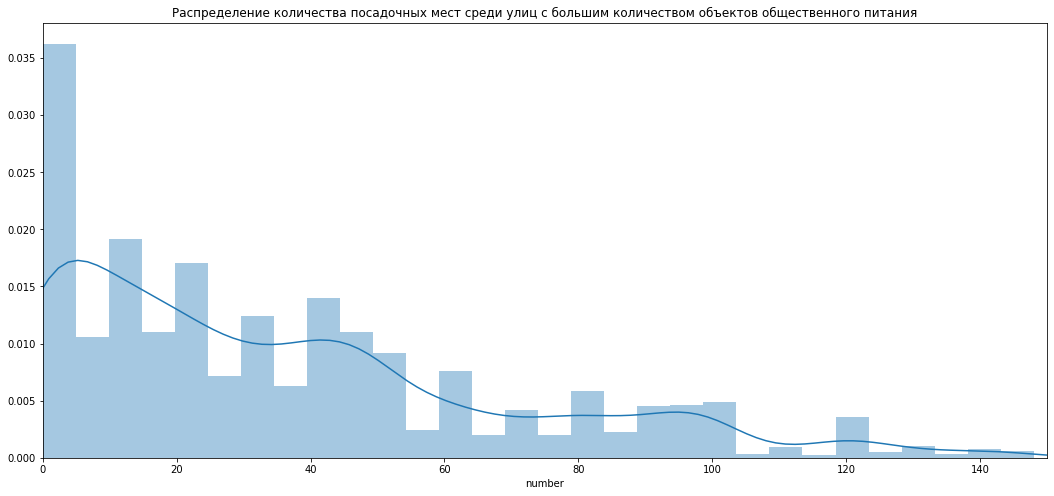

In [76]:
plt.figure(figsize=(18, 8))
plt.title('Распределение количества посадочных мест среди улиц с большим количеством объектов общественного питания')
sns.distplot(only_top_streets.query('number < 150')['number']);
plt.xlim(0, 150);

После исключения аномалий среднее значение уменьшилось до 35 посадочных мест. В общем для улиц с большим количеством объектов общественного питания характерна вместимость 30 мест, хотя по графику это не особо видно и он только мешает разглядеть тенденцию.

## <a id="summary" style="color:black">Выводы и рекомендации</a>
[Наверх](#top)

### Основные особенности заведений общественного питания Москвы:
##### 1. Наиболее распространенные объекты - кафе:
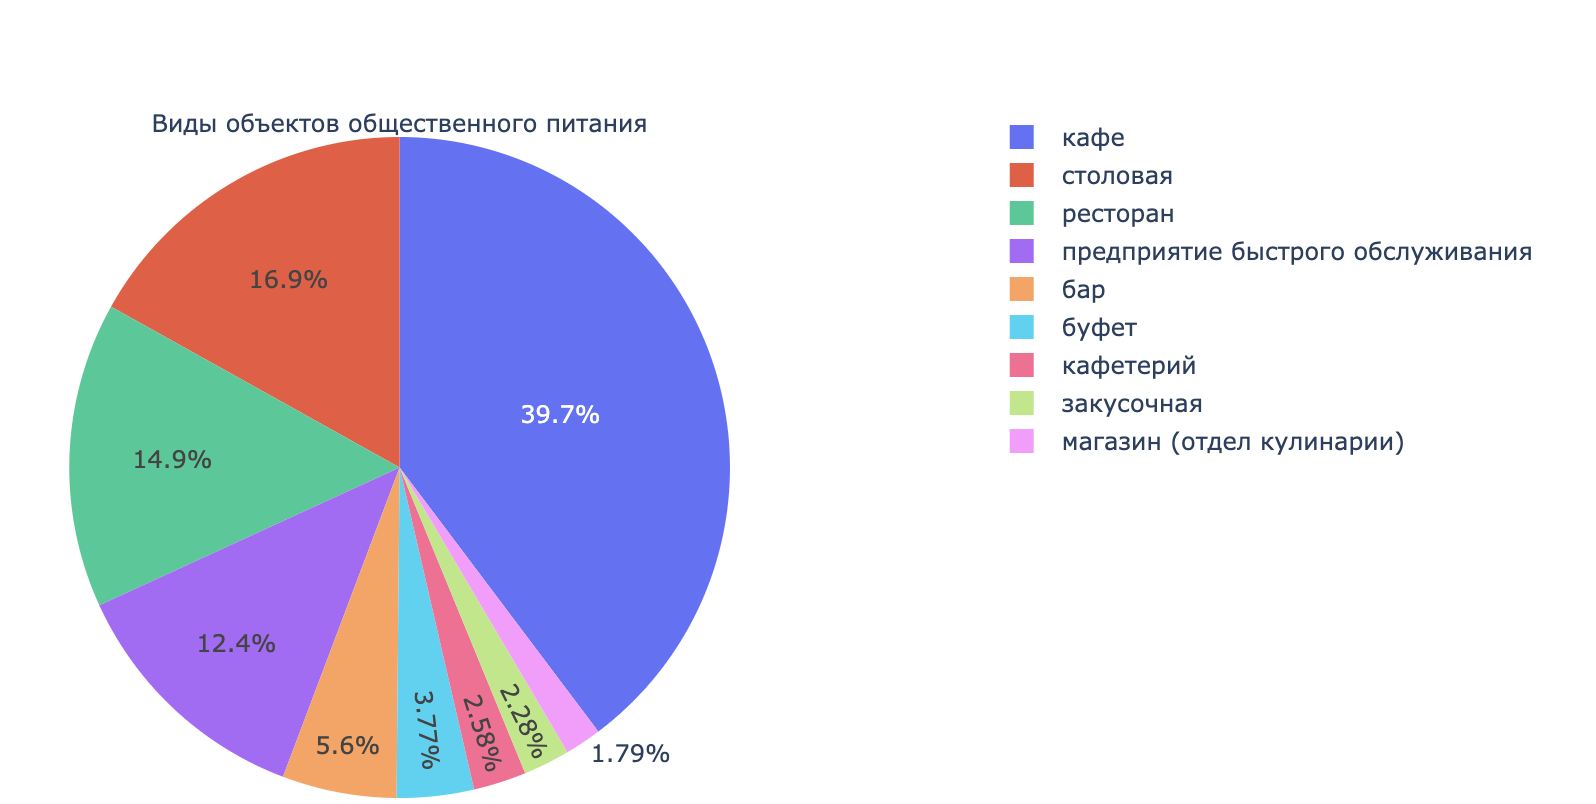

##### 2. Сетевые заведения составляют меньше 20% рынка:
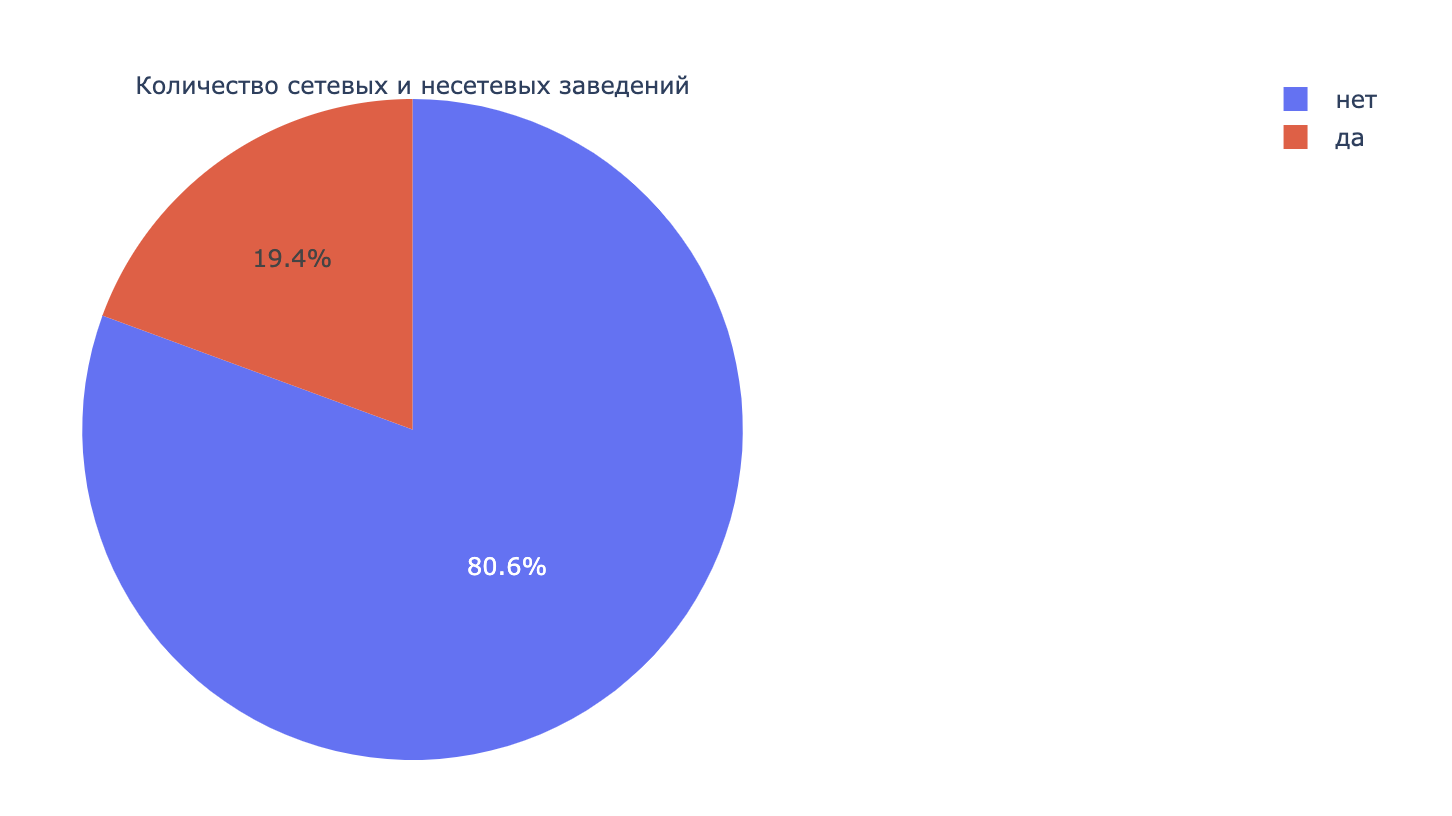

##### 3. Среди сетевых заведений преобладают предприятия быстрого обслуживания и отделы кулинарии в магазинах, рестораны и кафе занимают  около 20-25% сетевых заведений:

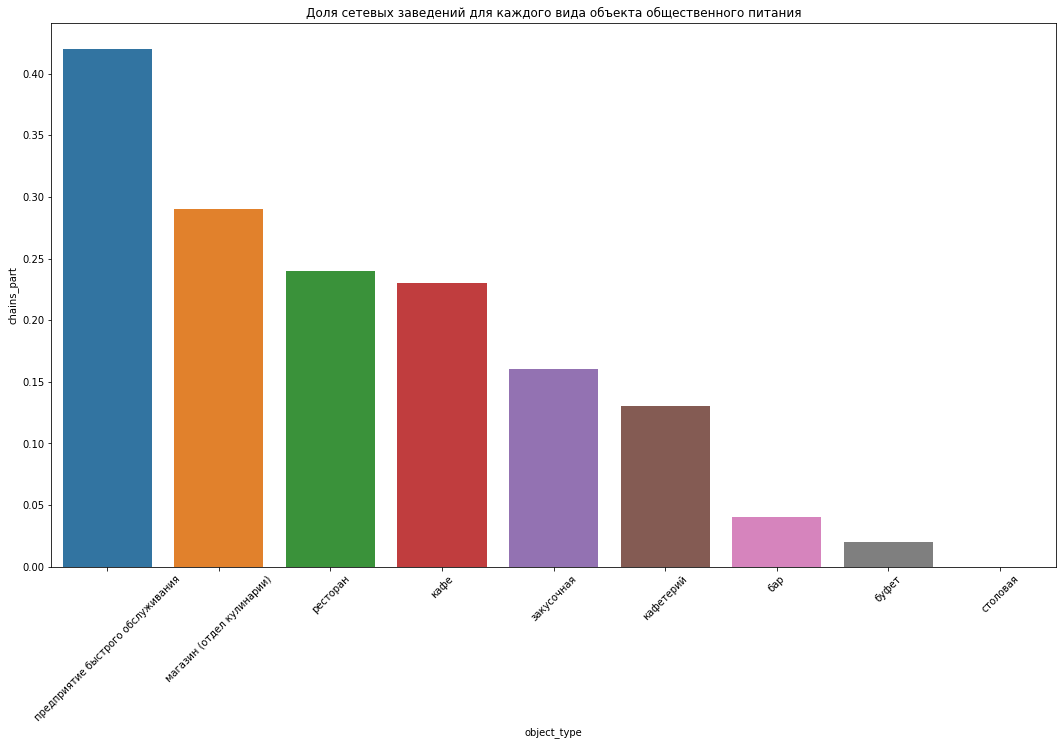

In [77]:
plt.figure(figsize=(18,10))
plt.title('Доля сетевых заведений для каждого вида объекта общественного питания')
plt.xticks(rotation=45)
sns.barplot(x='object_type', y='chains_part', data=objects_amount_chains);

##### 4. Для сетевых заведений характерны маленькие сети со средней вместимостью 45 мест
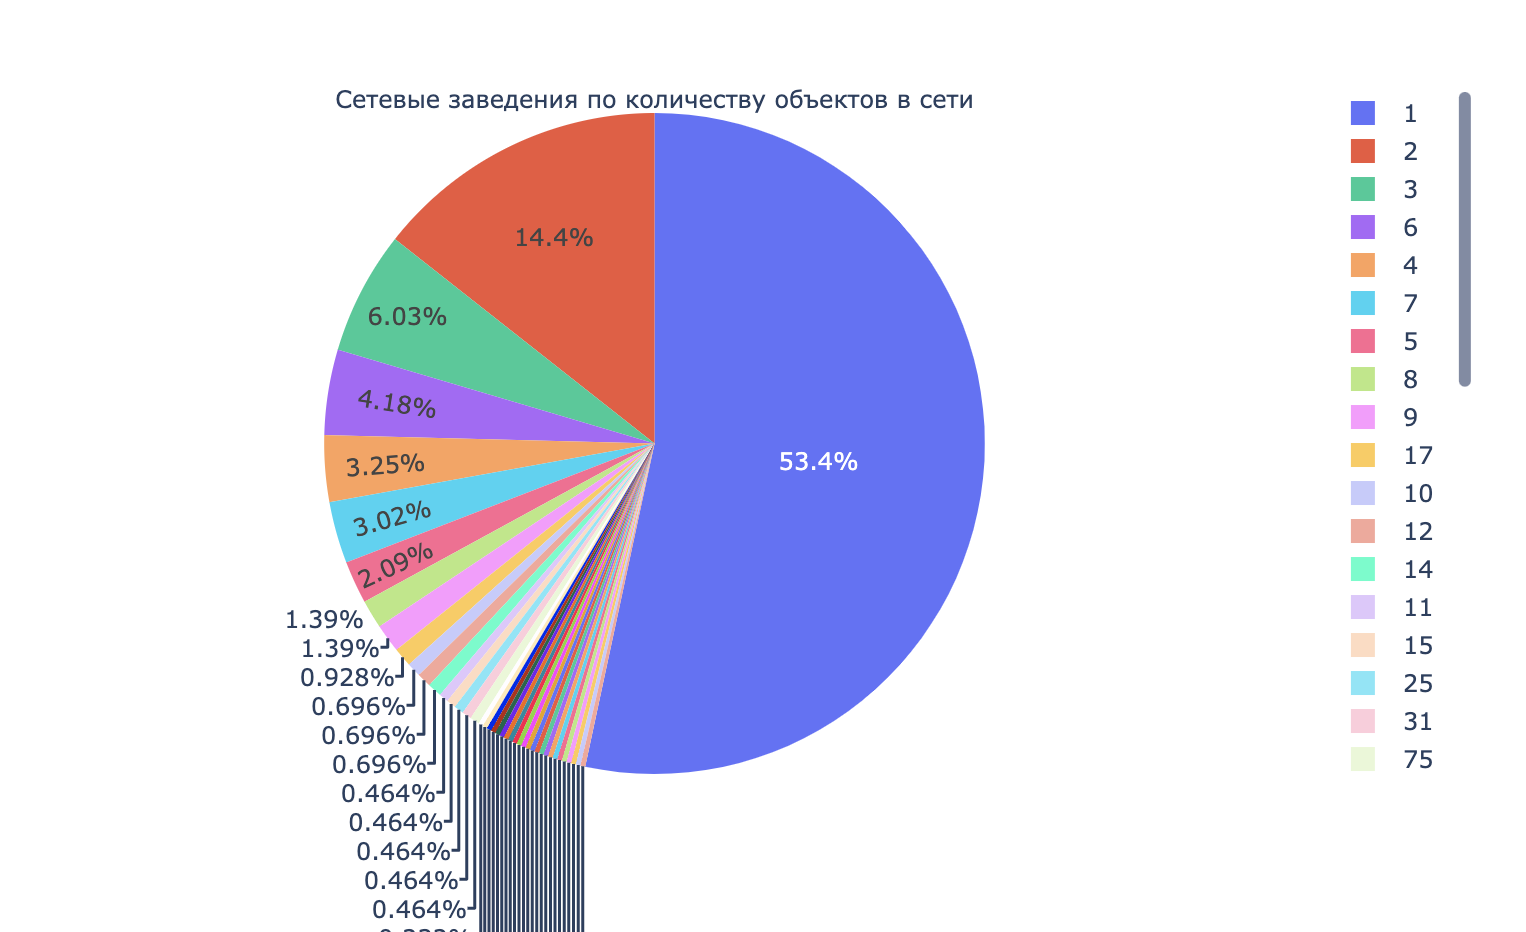

##### 5. Наибольшее количество посадочных мест вцелом предоставляют столовые и рестораны

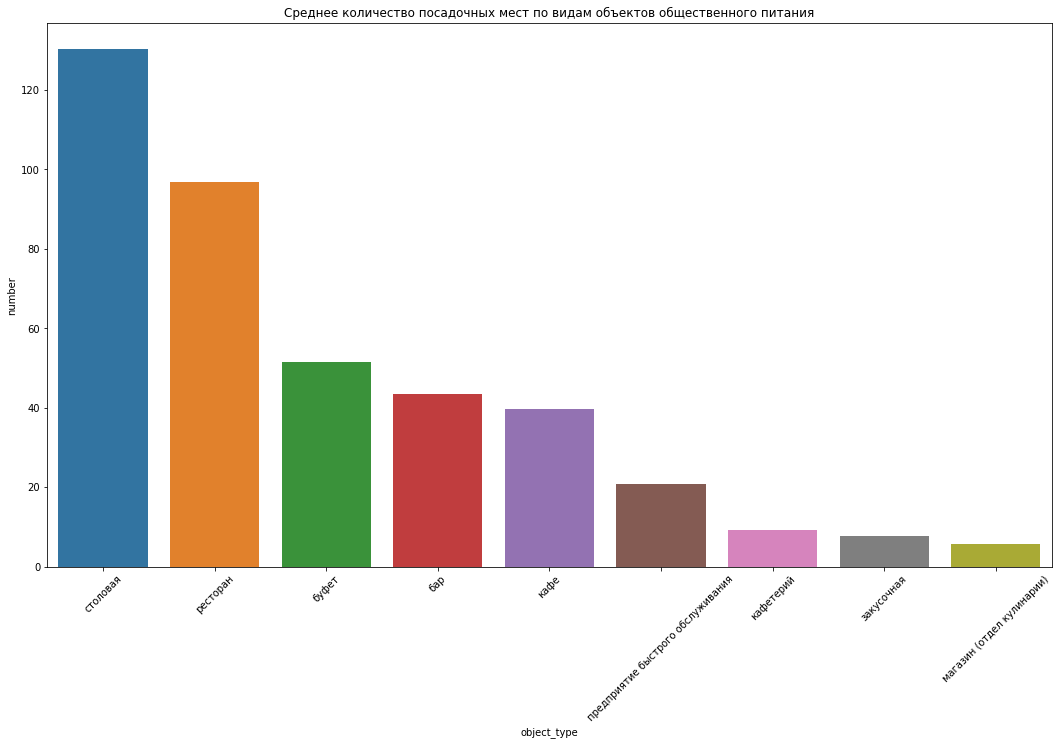

In [78]:
plt.figure(figsize=(18,10))
plt.title('Среднее количество посадочных мест по видам объектов общественного питания')
plt.xticks(rotation=45)
sns.barplot(x='object_type', y='number', data=mean_numbers);

##### 6.Наибольшее количество объектов общественного питания в Москыве находятся на улицах:
проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект,проспект Вернадского, Кутузовский проспект, Каширское шоссе, Кировоградская улица, а так же в таких поселенях как Зеленоград и Сосенское

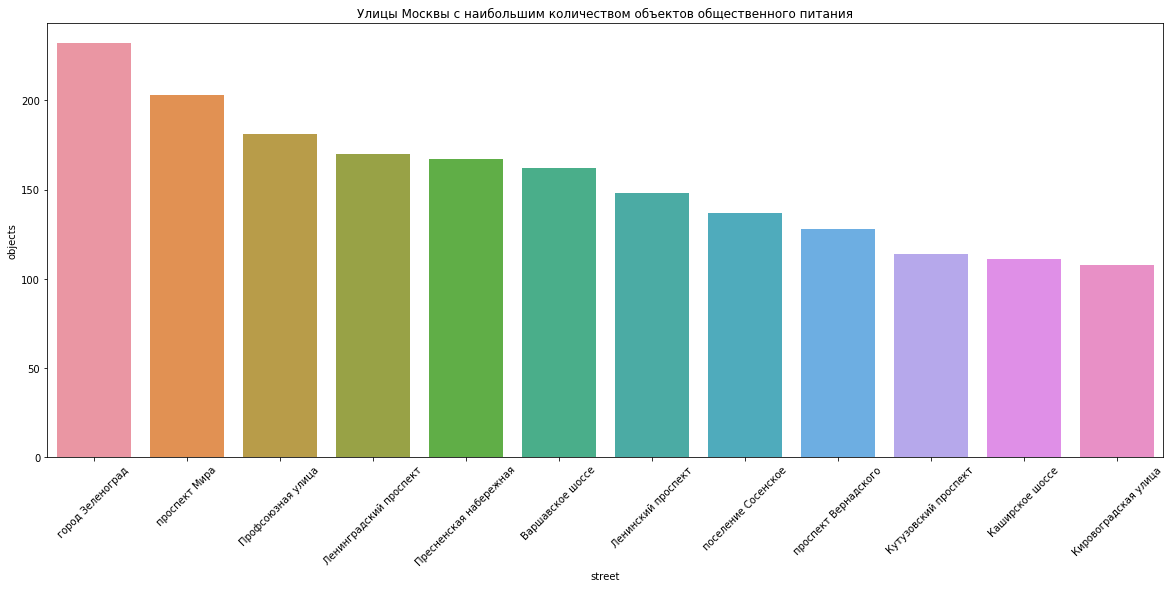

In [79]:
plt.figure(figsize=(20,8))
plt.title('Улицы Москвы с наибольшим количеством объектов общественного питания')
plt.xticks(rotation=45)
sns.barplot(x='street', y='objects', data=top_10_streets);

##### Эти улицы расположены в районах:

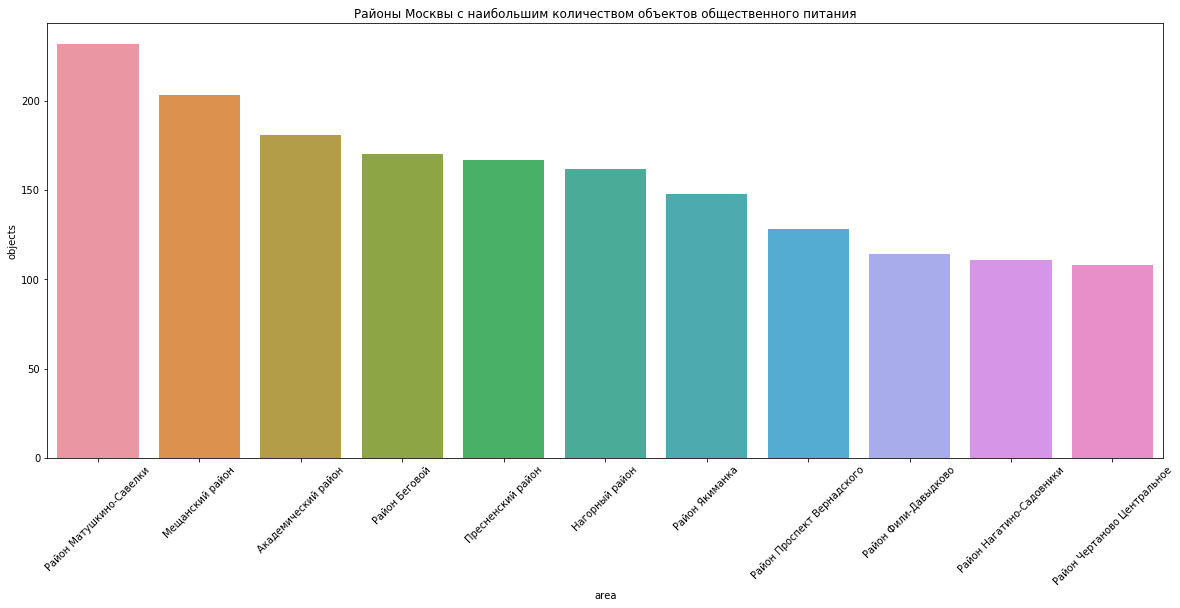

In [80]:
plt.figure(figsize=(20,8))
plt.title('Районы Москвы с наибольшим количеством объектов общественного питания')
plt.xticks(rotation=45)
sns.barplot(x='area', y='objects', data=area_streets_top10);

##### 7. Для улиц с большим количеством объектов общественного питания средняя вместимость заведений - 35 посадочных мест

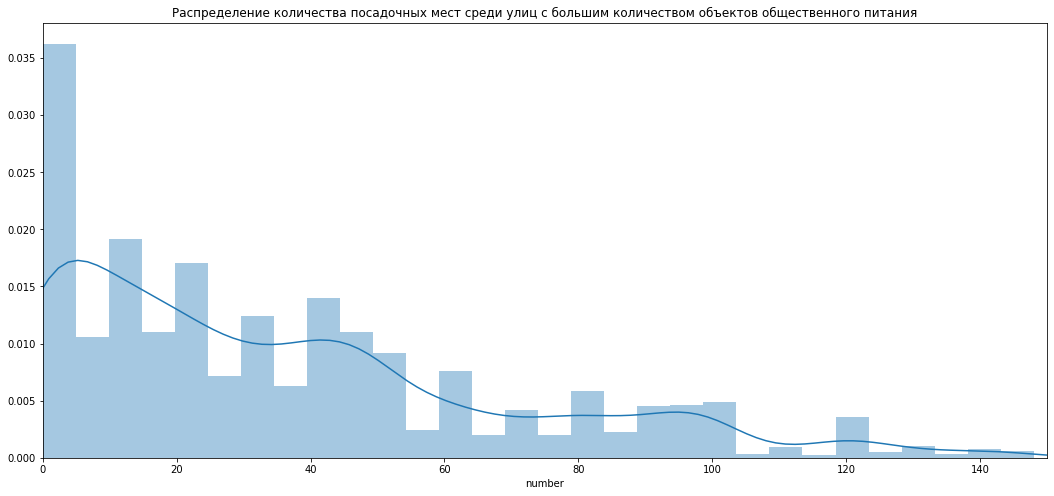

In [81]:
plt.figure(figsize=(18, 8))
plt.title('Распределение количества посадочных мест среди улиц с большим количеством объектов общественного питания')
sns.distplot(only_top_streets.query('number < 150')['number']);
plt.xlim(0, 150);

##### 8. Улицы с одним объектом общественного питания есть во многих районах в Москвы, в том числе в центральном
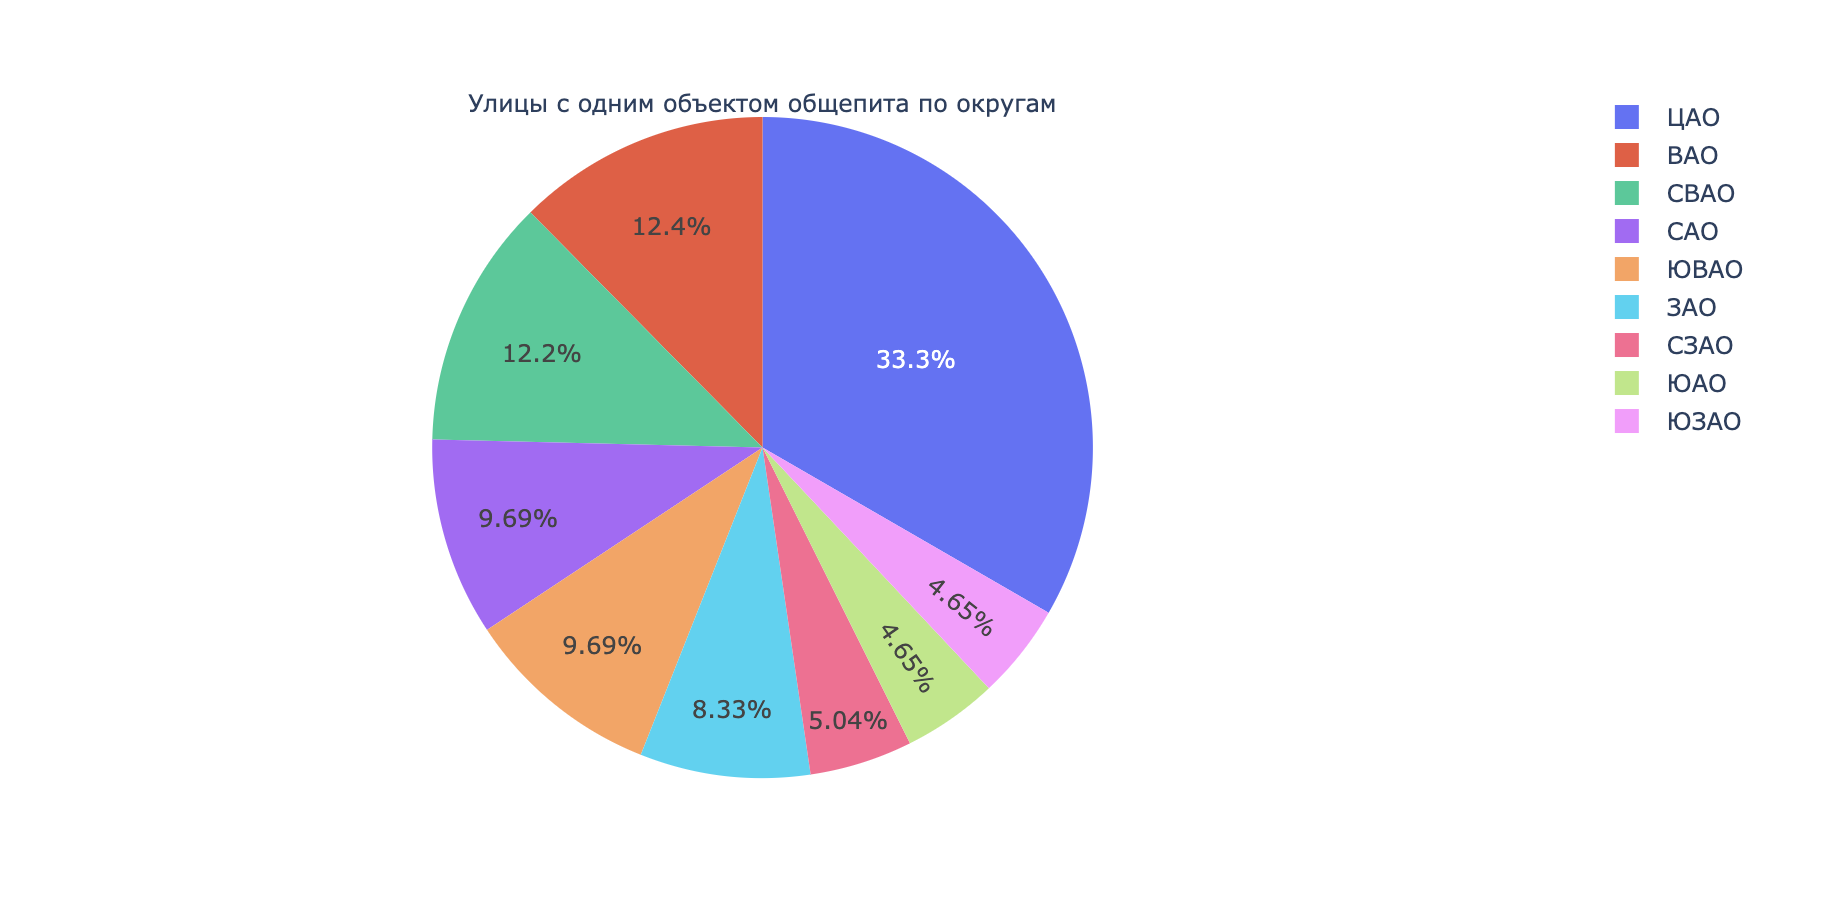
Центральный округ лидирует по количеству таких улиц, возможно из-за того, что в центре могут быть очень маленькие улицы

### Вывод:

**Основной вопрос исследования: оценить возможную продолжительность популярности небольшого кафе в Москве, где гостей обслуживают роботы.  
На рынке общепита Москвы преобладают несетевые заведения, так что небольшое кафе (если это понимать как несетевое) для начала вполне рабочая стратегия. Кафе -- самый распространенный вид заведений общественного питания, в среднем вместимость таких заведений около 40 человек. 45 человек -- это мало или много для обслуживания роботами? Представляется, что в многоместном заведении, роботам тяжелее ориентироваться и прокладывать траектории к столикам. Возможно предпринимателям стоит рассмотреть немного другой формат: буфет, кофейня или кафетерий -- маленькие заведения с небольшим ассортиментом закусок -- роботам не придется перемещаться несколько раз к своему столику, ведь скорее всего блюда будут уже готовы, нужно будет только взять заказ, а затем разом принести его. Что касается местоположения: можно удивить жителей поселения Сосенское или Зеленограда, возможно, им придется такое заведение по вкусу -- можное кафе на районе и не нужно выезжать в центр столицы. Так же, для такого заведения могут подойти улицы в центральном округе с одним заведением.**

[Наверх](#top)

## <a id="presentation" style="color:black">Презентация</a>

https://yadi.sk/i/0J3SGni7OUsqgw